In [101]:
#importing Python Packages:

import numpy as np
import pandas as pd
import pymysql as mysql
import matplotlib.pyplot as plt
import os
import getpass
import seaborn as sn

In [103]:
#Connecting to DataBase
conn =mysql.connect(host='localhost',port=int(3306),user='root',passwd=getpass.getpass'Jackimo123',db='Airline')

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2575916973.py, line 2)

In [81]:
#loading weather data csv file
weather_data = pd.read_csv("/Users/jackieurenda/Desktop/ADS 507/WeatherUS_2016.csv")
weather_data.head()

,Unnamed: 0,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [82]:
weather_df = pd.DataFrame(weather_data)

In [83]:
#city and Zipcode are null

weather_df.isna().sum()

Unnamed: 0              0
EventId                 0
Type                    0
Severity                0
StartTime(UTC)          0
EndTime(UTC)            0
Precipitation(in)       0
TimeZone                0
AirportCode             0
LocationLat             0
LocationLng             0
City                 1530
County                  0
State                   0
ZipCode              8497
dtype: int64

In [84]:
#dropping K values in front of the Airport Code Column

weather_df['AirportCode'] = weather_df['AirportCode'].str[1:]

weather_df.head()

,Unnamed: 0,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


<AxesSubplot: >

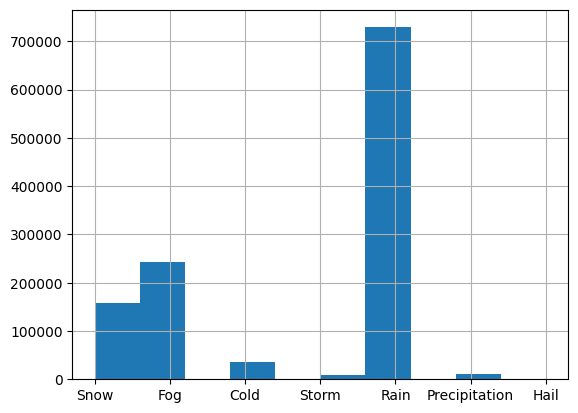

In [85]:
weather_df["Type"].hist()

In [86]:
weather_df.info

<bound method DataFrame.info of          Unnamed: 0    EventId  Type  Severity       StartTime(UTC)  \
0                 0        W-1  Snow     Light  2016-01-06 23:14:00   
1                 1        W-2  Snow     Light  2016-01-07 04:14:00   
2                 2        W-3  Snow     Light  2016-01-07 05:54:00   
3                 3        W-4  Snow     Light  2016-01-08 05:34:00   
4                 4        W-5  Snow     Light  2016-01-08 13:54:00   
...             ...        ...   ...       ...                  ...   
1185986     7476860  W-7574893  Snow     Light  2016-12-25 18:00:00   
1185987     7476861  W-7574894  Snow  Moderate  2016-12-25 18:30:00   
1185988     7476862  W-7574895  Snow     Light  2016-12-25 20:16:00   
1185989     7476863  W-7574896  Snow     Light  2016-12-31 07:53:00   
1185990     7476864  W-7574897   Fog    Severe  2016-12-31 16:10:00   

                EndTime(UTC)  Precipitation(in)     TimeZone AirportCode  \
0        2016-01-07 00:34:00           

In [87]:
airports_df = pd.read_csv("/Users/jackieurenda/Desktop/ADS 507/Airport Code.csv")
airports_df.head()

airports_df.describe()

,Code,Description
count,6385,6385
unique,6385,6342
top,01A,"Doha, Qatar: Al Udeid Air Base"
freq,1,3


In [88]:
#Renaming Code column to AirportCode
airports_df =airports_df.rename(columns={"Code": "AirportCode"})

airports_df.head()

,AirportCode,Description
0,01A,"Afognak Lake, AK: Afognak Lake Airport"
1,03A,"Granite Mountain, AK: Bear Creek Mining Strip"
2,04A,"Lik, AK: Lik Mining Camp"
3,05A,"Little Squaw, AK: Little Squaw Airport"
4,06A,"Kizhuyak, AK: Kizhuyak Bay"


In [89]:
#Merging Datasets (Filtering)

weather_data_filtered = pd.merge(weather_df, airports_df, on="AirportCode")

weather_data_filtered.head()

,Unnamed: 0,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,Description
0,2228,W-2242,Rain,Light,2016-01-05 21:45:00,2016-01-05 22:45:00,0.00,US/Central,AXS,34.6986,-99.3381,Altus,Jackson,OK,73521.0,"Altus, OK: Altus/Quartz Mountain Regional"
1,2229,W-2243,Rain,Light,2016-01-05 22:53:00,2016-01-05 23:01:00,0.03,US/Central,AXS,34.6986,-99.3381,Altus,Jackson,OK,73521.0,"Altus, OK: Altus/Quartz Mountain Regional"
2,2230,W-2244,Rain,Light,2016-01-06 00:10:00,2016-01-06 00:20:00,0.00,US/Central,AXS,34.6986,-99.3381,Altus,Jackson,OK,73521.0,"Altus, OK: Altus/Quartz Mountain Regional"
3,2231,W-2245,Rain,Light,2016-01-06 20:37:00,2016-01-06 20:51:00,0.00,US/Central,AXS,34.6986,-99.3381,Altus,Jackson,OK,73521.0,"Altus, OK: Altus/Quartz Mountain Regional"
4,2232,W-2246,Rain,Light,2016-01-06 21:07:00,2016-01-06 22:58:00,0.03,US/Central,AXS,34.6986,-99.3381,Altus,Jackson,OK,73521.0,"Altus, OK: Altus/Quartz Mountain Regional"


In [90]:
airport_df_new = weather_data_filtered[['AirportCode', 'Description']]
airport_df_new.head()

,AirportCode,Description
0,AXS,"Altus, OK: Altus/Quartz Mountain Regional"
1,AXS,"Altus, OK: Altus/Quartz Mountain Regional"
2,AXS,"Altus, OK: Altus/Quartz Mountain Regional"
3,AXS,"Altus, OK: Altus/Quartz Mountain Regional"
4,AXS,"Altus, OK: Altus/Quartz Mountain Regional"


In [91]:
#drop description for weather_filtered data

weather_data_new = weather_data_filtered.drop(columns=["Unnamed: 0", "Description"])

weather_data_new.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-2242,Rain,Light,2016-01-05 21:45:00,2016-01-05 22:45:00,0.00,US/Central,AXS,34.6986,-99.3381,Altus,Jackson,OK,73521.0
1,W-2243,Rain,Light,2016-01-05 22:53:00,2016-01-05 23:01:00,0.03,US/Central,AXS,34.6986,-99.3381,Altus,Jackson,OK,73521.0
2,W-2244,Rain,Light,2016-01-06 00:10:00,2016-01-06 00:20:00,0.00,US/Central,AXS,34.6986,-99.3381,Altus,Jackson,OK,73521.0
3,W-2245,Rain,Light,2016-01-06 20:37:00,2016-01-06 20:51:00,0.00,US/Central,AXS,34.6986,-99.3381,Altus,Jackson,OK,73521.0
4,W-2246,Rain,Light,2016-01-06 21:07:00,2016-01-06 22:58:00,0.03,US/Central,AXS,34.6986,-99.3381,Altus,Jackson,OK,73521.0


#### Data filtering between the weather data and airports code dataset reduced data instances from 1,185,991 to 763,320

In [92]:
uniqueValues_weather = weather_data_new['AirportCode'].nunique()
print(uniqueValues_weather)

uniqueValues_airports = airport_df_new['AirportCode'].nunique()
print(uniqueValues_airports)



1345
1345


In [22]:
tableNames = pd.read_sql("""SHOW TABLES""", conn)
tableNames

/var/folders/51/q9hxxxv54rs_ms2xxv3y82fm0000gn/T/ipykernel_10524/957063789.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tableNames = pd.read_sql("""SHOW TABLES""", conn)


,Tables_in_airline
0,l_airline_id
1,l_airport
2,l_airport_id
3,l_airport_seq_id
4,l_cancellation
5,l_city_market_id
6,l_deparrblk
7,l_distance_group_250
8,l_diversions
9,l_months


In [23]:
#Renaming the Table in DataBase


  
# MySQL query for for renaming a table
rename_table = pd.read_sql("ALTER TABLE on_time_performance_2016_1 RENAME to on_time_performance_2016", conn)
  

/var/folders/51/q9hxxxv54rs_ms2xxv3y82fm0000gn/T/ipykernel_10524/3202433327.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  rename_table = pd.read_sql("ALTER TABLE on_time_performance_2016_1 RENAME to on_time_performance_2016", conn)


DatabaseError: Execution failed on sql 'ALTER TABLE on_time_performance_2016_1 RENAME to on_time_performance_2016': (1146, "Table 'airline.on_time_performance_2016_1' doesn't exist")

In [29]:
on_time_performance = pd.read_sql_query('SELECT * FROM on_time_performance_2016', conn)


/var/folders/51/q9hxxxv54rs_ms2xxv3y82fm0000gn/T/ipykernel_10524/3406315267.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  on_time_performance = pd.read_sql_query('SELECT * FROM on_time_performance_2016', conn)


In [59]:
on_time_performance.head()


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,...,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,...,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,...,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,...,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,...,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN


In [61]:
#Dropping Uneccesary columns in on time performance dataset

on_time_performance_df2 = on_time_performance[on_time_performance.columns[5:58]]

In [62]:
on_time_performance_df2.head()

,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,...,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay
0,2016-01-06,AA,19805,AA,N4YBAA,43,11298,1129804,30194,DFW,...,None,0,158.0,155.0,132.0,1.0,986.0,4,NaN,NaN
1,2016-01-07,AA,19805,AA,N434AA,43,11298,1129804,30194,DFW,...,None,0,158.0,150.0,126.0,1.0,986.0,4,NaN,NaN
2,2016-01-08,AA,19805,AA,N541AA,43,11298,1129804,30194,DFW,...,None,0,158.0,170.0,135.0,1.0,986.0,4,NaN,NaN
3,2016-01-09,AA,19805,AA,N489AA,43,11298,1129804,30194,DFW,...,None,0,158.0,151.0,129.0,1.0,986.0,4,NaN,NaN
4,2016-01-10,AA,19805,AA,N439AA,43,11298,1129804,30194,DFW,...,None,0,158.0,171.0,137.0,1.0,986.0,4,0.0,0.0
